# FMCW Radar 100 - Radar Imaging

## Radar vs Camera Imaging



### Summary

> Radar elements are combined coherently to form a sparse TOI matrix.

> CMOS imager are combined indepentently to form a dense TOI matrix.

| Parameter| Radar imaging formulas | Camera field of view and angular resolution|
|:---------|:------|:-------|
|FOV **w/o lense**      | $ 6843AOP_{FOV} \approx 140^o $   | $ fov \approx 180^o  $ |
|FOV **w/** lense      | TBD    | $ fov = 2 \cdot tan^{-1}(\frac{H}{2 \cdot f}) $ |
|MIMO FOV **w/o** lense  (3)    | $ \theta_{FOV} = +/- arcsin(\frac{\lambda}{2d})  $  | $ fov = 2 \cdot tan^{-1}(\frac{H}{2 \cdot f}) $ |
| single element angular resolution **w/o lense** | $ \Delta \theta_1 \approx \frac{1}{L \cdot \lvert cos \theta \rvert} $ | N/A |
| single element angular resolution **w/ lense** | $ TBD $ | $ fov = 2 \cdot tan^{-1}(\frac{u}{2 \cdot f}) $ |
|sensing element size | $\approx \lambda \approx 5mm$|1 to 10 $\mu$m * |
| N (number sensing element)| 6843 or 2243: 12  |  |
|  | M*2243: $ N = 12*4^{M-1} \implies M>8 \iff N>10^6$  | VGA (~300k) up to MPix |
| array angular resolution (1) | $ \Delta \theta_N \approx \frac{1}{N \cdot \lvert cos \theta \rvert} $, with N number element in azimuth or elevation | $ fov = 2 \cdot tan^{-1}(\frac{u}{2 \cdot f}) $ |
| array angular resolution (2) | $ \Delta \theta_N \approx \frac{\lambda}{N \cdot d \cdot \lvert cos \theta \rvert} $, with N number element in azimuth or elevation | $ fov = 2 \cdot tan^{-1}(\frac{u}{2 \cdot f}) $ |
| sensor size | $ \approx \lambda ^2 * 4 \approx 10mm \cdot 10mm $ or $ 100mm^2 *4^{M-1} $  | ~1 mm x 1mm|
| TX Beam Forming angle width | $ \theta_{width} = \frac{sin(N\pi d_x (s-s_0)/\lambda_0)}{N sin(\pi d_x (s-s_0)/\lambda_0)} $ (Eq 1.57 p17 \[1\])| N/A |
| Depth of field | N/A | $\approx \frac{2D^2FC}{f^2}$ |
| raw data processing | Range, CFAR, AoA (LFB, CAPON), Doppler | Demosaic, YUV, Gamma, Sharpnes, color LPF, ALC, ... |
|temporal resolution | ?10ms / frame ? | 60fps ~ 16ms/frame|


where:
* C is the circle of confusion (the diameter of which is expressed in m)
* D is distance to TOI (m)
* f is the focal of the lense ($m^{-1}$)
* F is the lense `f` number (unit-less)
* H is the sensor size:
    * H = N * u
    * N is the number of sensors
    * u is the sensor size

(1), (2), (3) apperture is a function of N*d  on angular resolution
where λ is the wavelength of the radar signal and d is the
spatial spacing between the channels. The field of view (FOV,
maximum unambiguous angle without grating lobes) can be
calculated by θFOV <font color='#ff0000'> so that a diminished FOV of (< 180◦)
can be achieved by a spacing of λ/2 or below </font>

Sources:   
\[1] Robert J. Mailloux - Phased Array Antenna Handbook-Artech House (2005)



### Notes:
radar angular resolution \[4.\] Section 6.6.5

for more on beyond simple pinhole [here fig 5](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

camera angular resolution limited by [Airy disk](https://en.m.wikipedia.org/wiki/Airy_disk) or diffraction where

* C: circle of confusion   
$ sin \theta \approx 1.22 \frac{\lambda}{d}$

* pixel sensor size [source](https://www.ephotozine.com/article/complete-guide-to-image-sensor-pixel-size-29652#:~:text=Pixel%20size%20ranges%20from%201.1,1mm%20x%201mm%20in%20size.)
> Pixel size ranges from 1.1 microns in the smallest smartphone sensor, to 8.4 microns in a Full-Frame sensor. As an example, the 8 megapixel sensor above has a resolution of 3,264 x 2,448 pixels, with 327,184 pixels in an area just 1mm x 1mm in size


## Considerations on coherent sampling

aka Spatial filtering

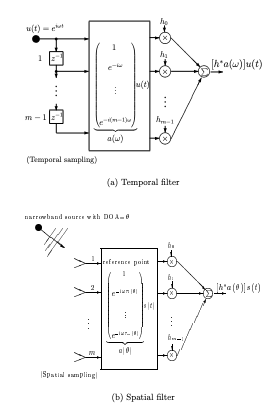

From the above we can see the clear analogy FIR filtering in time domain and spatial filtering by the antenna array.

A FIR filter is defined by

$ y_F (t) = \sum_{k=0}^{m-1}h_ku(t-k)\triangleq h*y(t)$ (6.3.4)

Where:
* $h_k$ are the filter weights
* u(t) is the input to the filter

Similarly for the spatial filter

$ y_F (t) = \lbrack h*a(\theta) \rbrack \cdot s(t) $

Where $ a(\theta) = \lbrack 1 e^{j2π·d sin \theta/λ} e^{j2π·2\cdot d sin \theta/λ} e^{j2π·3\cdot d sin \theta/λ} .. e^{j2π·N\cdot d sin \theta/λ} \rbrack $

Which clearly shows that the spatial filter can be selecte to enhance (attenuate) the signals coming from a given direction $\theta$ by making $ h * a(\theta) $ large (or small)

The CAPON DOA are the locations of the largest peaks of:

$ \frac{1}{a(\theta) R^{-1} a(\theta)} $ (6.3.26)

### AoA Compute Complexity

| Algorithm | Setup Operations | Setup Operations per Solution | Operations per θ Hypothesis | # Operations per θ Hypothesis |
|--|--|--|--|--|
|PSBF | N/A | N/A | 2 matrix mult | 42 |
|CAPON | 1 Matrix inversion | 216 | 2 matrix mult2, 1 div | 43 |
|MUSIC | 1 SVD, 1 Matrix mult, 1 threshold | 402 | 2 matrix mult2, 1 div | 43 |
|MLE | N/A | N/A | N/A | 630-6300* |


> In our experiments, MUSIC/ESPRIT has fairly good performance when the number of 'virtual antennas' is high (say 40). For small number of antennas (say 4) we haven't seen good performance.
source: [E2E](https://e2e.ti.com/support/sensors-group/sensors/f/sensors-forum/773122/awr1443-fmcw-radar-angle-resolution-music-algorithm)


\[1.\] pp35



### CAPON

> Capon DOA estimation has been empirically found to possess superior performance as compared with beamforming.
source \[4 p 300\]

$ E {|y_F (t) |^2 } = h* R h $ (5.4.3) or (6.3.8)

Which is the classical formula for the Energy output of a linear filter.
Where:
* E: energy output of the linear filter
* h: filter
* R: the covariance matrix

Which for spatial filter can be rewritten as :

$ E {|y_F (t) |^2 } = a^*(\theta) \cdot R \cdot a(\theta) $ (Eq. \[4.\] 5.4.3)

Given that the covariance matrix R cannot be exactly determined, it can be estimated by

$ \hat R = \frac{ \sum_{t=1}^{N} y(t) \cdot y^*(t) }{N} $

From which, the problem defined by CAPON is 1969 is :

$ \underset{h}{min} (h*Rh) $ subject to $ h^*a(\theta) =1$ (Eq. \[4.\]6.3.23)

The solution to which is proven in 5.4 and is

$ h = \frac{R^{-1}a(\theta)}{a^*(\theta)R^{-1}a(\theta)}$ (Eq. \[4.\]6.3.24)

which when inserted in the output power formula  (Eq. \[4.\]6.3.8)

$ E \left\{ \lvert y_F (t) \rvert ^2 \right\} = \frac{1}{a^*(\theta)R^{-1}a(\theta)}$

From which we can derive that the CAPON DOA estimates are the locations of the largest peaks for the function

$ \frac{1}{a^*(\theta)R^{-1}a(\theta)} $ (Eq. \[4.\] 6.3.26)


## Sensing elements


### Radar Antenna patch element

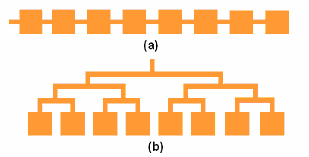
a. linear feed vs b. corporate feed patch antenna

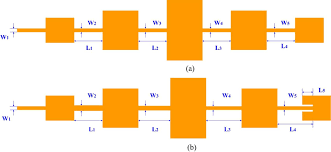
2 series feed antenna with elements of different size (but each antenna is the same)





### Radar Array


#### Physical array

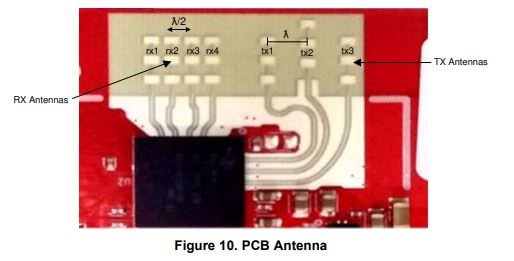

> Source E2E
[link]()

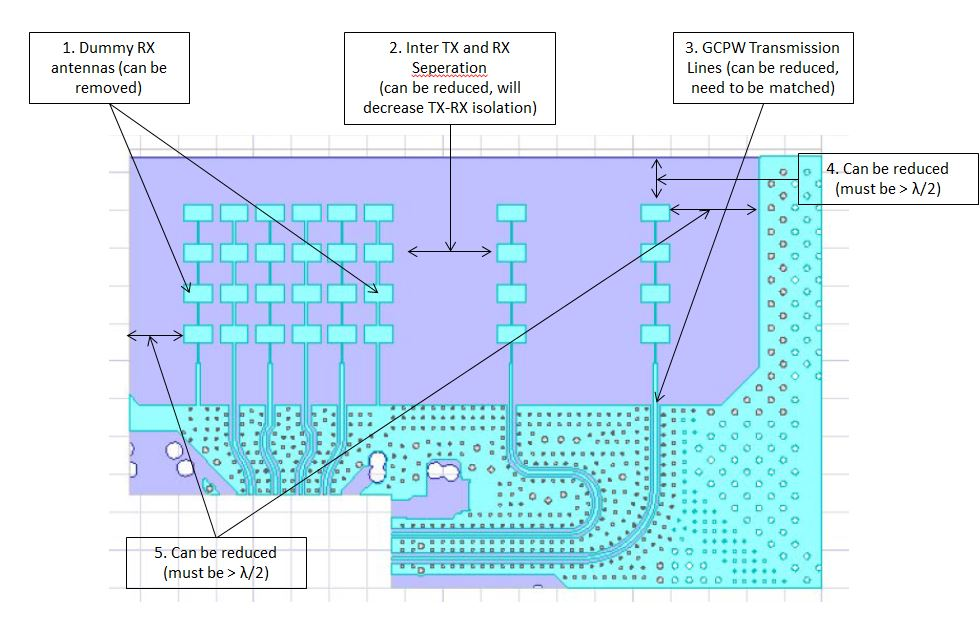

> source E2E

#### Virtual array

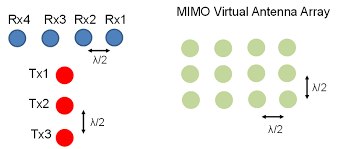

### Imaging sensor

> While patch antenna for visible light is an active topic of [research](https://www.researchgate.net/figure/Tuning-the-resonant-wavelength-of-an-optical-patch-antenna-a-Optical-patch-antenna_fig6_283975498) not industrial sensor uses this principle today


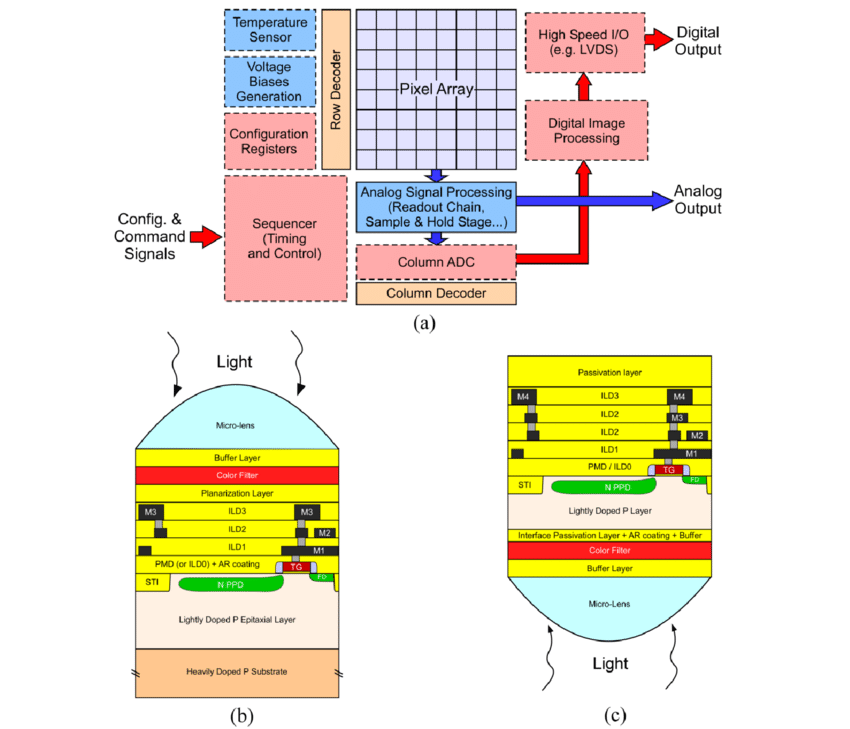

## REFERENCES
[1. Performance Analysis of Angle of Arrival
Algorithms Applied to Radiofrequency
Interference Direction Finding](https://scholar.afit.edu/cgi/viewcontent.cgi?article=3245&context=etd#page53)

[2. ISP block diagram](http://static6.arrow.com/aropdfconversion/650cbf6bf9247a9033be1b6abb5bc7f5a14e1960/t8ev5_may2012_e.pdf)

[3. simple introduction to BF as LTI filters](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.178.76&rep=rep1&type=pdf)

4. SPECTRAL ANALYSIS OF SIGNALS - Petre Stoica

$$ \theta = sin^{-1} (\frac{\omega \cdot \lambda}{2 \cdot \pi \cdot d})$$
maximum field of view for $d = \frac{\lambda}{2}$
$$ \theta = sin^{-1} (\frac{\omega }{\pi })$$